In [1]:
import numpy as np
import pandas as pd; pd.set_option('display.max_columns', 500); pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm; plt.rcParams['figure.figsize'] = (12, 6); plt.style.use('seaborn')
import seaborn as sns
import plotly
import plotly.express as px
from plotly import graph_objects as go
from tqdm.notebook import tqdm; tqdm.pandas()
import os
import carball
import requests
from urllib.request import urlopen, Request
import datetime
import pickle

def SaveList(my_list, filename):
    "Save my_list list to filename"
    with open(filename, "wb") as f:
        pickle.dump(my_list, f)

def LoadList(filename):
    "Returns list from file"
    with open(filename, "rb") as f:
        return pickle.load(f)

In [2]:
initial_dir = dir()

In [3]:
yip_id = "76561198208791963"

Calculated:  
Replay meta info: url de la replay basic info, url de la replay info, fecha, mmrs   
Replay basic info: mi mmr  
Replay info: analysis

# Local replays con Carball y Rust

In [4]:
# %%cmd
# cd rocketLeagueRustParser-main
# cargo run

In [5]:
# replays_local_analysis_df = pd.read_pickle("replays_local_analysis.df")

In [6]:
# import os
# parsed_replays_path = "rocketLeagueRustParser-main/parsed_replays/"
# json_replays = os.listdir(parsed_replays_path)

# new_json_replays = [x for x in json_replays if not replays_local_analysis_df.gameMetadata_name.str.contains(x.split(' ')[0]).any()]

# print(f"Found {len(new_json_replays)} new replays.")

In [7]:
# from carball.json_parser.game import Game
# from carball.analysis.analysis_manager import AnalysisManager
# from IPython.utils import io

# import time

# counter = 0
# start_time = time.time()
# new_replays_local_analysis_list = []
# for json_path in new_json_replays:

#     with io.capture_output() as captured:

#         game = Game()
#         try:
#             game.initialize(file_path = parsed_replays_path + json_path)

#             analysis_manager = AnalysisManager(game)

#             analysis_manager.create_analysis()
            
#         except:
#             continue
#         new_replays_local_analysis_list.append(pd.json_normalize(analysis_manager.get_json_data(), sep='_'))

#     counter += 1
#     print(counter, "of", len(new_json_replays),
#         (time.time() - start_time)/counter,
#         "Estimated total duration:", (time.time() - start_time)/counter*len(new_json_replays)/60, "mins.", end="\r")

# if len(new_replays_local_analysis_list) > 0:
#     replays_local_analysis_df = pd.concat([replays_local_analysis_df, pd.concat(new_replays_local_analysis_list)])
# else:
#     print('No new valid replays to add.')

# replays_local_analysis_df['gameMetadata_date'] = pd.to_datetime(replays_local_analysis_df.gameMetadata_time, unit='s')
# replays_local_analysis_df = replays_local_analysis_df.set_index('gameMetadata_date')

# replays_local_analysis_df.to_pickle("replays_local_analysis.df")

In [8]:
# a = replays_local_analysis_df.players.explode().apply(pd.json_normalize, sep='_')
# players_df = pd.concat(a.values)
# players_df.index = a.index
# del(a)
# players_df

In [9]:
# meta_columns = """gameMetadata_name,gameMetadata_id,gameMetadata_map,gameMetadata_score_team0Score,gameMetadata_score_team1Score,gameMetadata_score_team1Score,gameMetadata_teamSize,gameMetadata_playlist,
# gameStats_neutralPossessionTime,gameStats_ballStats_positionalTendencies_timeOnGround,gameStats_ballStats_positionalTendencies_timeLowInAir,
# gameStats_ballStats_positionalTendencies_timeHighInAir,gameStats_ballStats_positionalTendencies_timeInDefendingHalf,gameStats_ballStats_positionalTendencies_timeInAttackingHalf,
# gameStats_ballStats_positionalTendencies_timeInDefendingThird,gameStats_ballStats_positionalTendencies_timeInNeutralThird,
# gameStats_ballStats_positionalTendencies_timeInAttackingThird,gameStats_ballStats_positionalTendencies_timeBehindBall,gameStats_ballStats_positionalTendencies_timeInFrontBall,
# gameStats_ballStats_positionalTendencies_timeNearWall,gameStats_ballStats_positionalTendencies_timeInCorner,gameStats_ballStats_positionalTendencies_timeOnWall,
# gameStats_ballStats_averages_averageSpeed""".replace('\n', '').split(',')

# df = players_df.join(replays_local_analysis_df[meta_columns])
# df.tail(2)

In [10]:
# df_old = pd.read_pickle('df.df')

In [11]:
# df_old.columns = df.columns

In [12]:
# df_old.T.reindex(df.T.index).T

In [13]:
# pd.concat([df_old.T.reindex(df.T.index).T, df.query('id_id == @yip_id')])

# Ballchasing

Replay meta: url de replay info, replay title, playlist, date, resultado, players rank  
Replay info: analysis (players info)

In [26]:
ballchasing_metadata_df.sort_values('date')

,id,link,replay_title,map_code,map_name,playlist_id,playlist_name,duration,overtime,overtime_seconds,season,season_type,date,date_has_tz,visibility,created,min_rank_tier,min_rank_division,min_rank_name,min_rank_id,max_rank_tier,max_rank_division,max_rank_name,max_rank_id,uploader_steam_id,uploader_name,uploader_profile_url,uploader_avatar,blue_goals,blue_players,orange_goals,orange_players,blue_name,orange_name,groups,recorder
rocket_league_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5D8BDA27483CD3E5CC4B539055A36BF4,aed0fb5f-d098-4488-9261-8b9c1c64da1e,https://ballchasing.com/api/replays/aed0fb5f-d...,5D8BDA27483CD3E5CC4B539055A36BF4,eurostadium_p,Mannfield,ranked-doubles,Ranked Doubles,422,False,NaN,1,NaN,2015-09-07 18:00:00+00:00,False,public,2019-02-23T19:33:55.50847Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Platform,NaN,/static/rl-ball.png,4.0,"[{'start_time': 0, 'end_time': 422.60092, 'nam...",3.0,"[{'start_time': 0, 'end_time': 422.60092, 'nam...",NaN,NaN,NaN,Freedom
03CA08FE4EB0EA7B13CA1FAED4F522FF,3d43b0ac-1f4b-4cef-98cc-6d38fbb8373e,https://ballchasing.com/api/replays/3d43b0ac-1...,2019-12-20.13.28 vitenho Ranked Standard Win,eurostadium_p,Mannfield,ranked-standard,Ranked Standard,374,False,NaN,13,NaN,2019-12-20 12:28:34+00:00,False,public,2019-12-20T16:28:47.85884Z,NaN,NaN,NaN,NaN,18.0,3.0,Champion III Division 3,champion-3,76561198332705515,vitenho,https://steamcommunity.com/id/vitenho_/,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,"[{'start_time': 0, 'end_time': 374.392, 'name'...",7.0,"[{'start_time': 0, 'end_time': 374.392, 'name'...",NaN,NaN,NaN,NaN
D960CCF345DF6395D25BAE807071C480,97a72b6e-319b-48cd-98ee-11fb349e2d7e,https://ballchasing.com/api/replays/97a72b6e-3...,2020-02-14.20.30 lexin Ranked Standard Win,farm_p,Farmstead,ranked-standard,Ranked Standard,179,False,NaN,13,NaN,2020-02-14 19:30:02+00:00,False,public,2020-02-14T23:30:14.55162Z,16.0,4.0,Champion I Division 4,champion-1,18.0,3.0,Champion III Division 3,champion-3,76561198985841779,leoliso,https://steamcommunity.com/id/leoilshow/,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,"[{'start_time': 0, 'end_time': 179.823, 'name'...",4.0,"[{'start_time': 0, 'end_time': 179.823, 'name'...",NaN,NaN,NaN,NaN
BF66D4A44DE44932C089868242571896,146df2c1-9e1e-4ee6-8f77-4362b22f7baa,https://ballchasing.com/api/replays/146df2c1-9...,2020-02-14.20.38 lexin Ranked Standard Win,neotokyo_standard_p,Neo Tokyo (Standard),ranked-standard,Ranked Standard,376,False,NaN,13,NaN,2020-02-14 19:38:27+00:00,False,public,2020-02-14T23:38:41.60312Z,15.0,1.0,Diamond III Division 1,diamond-3,18.0,3.0,Champion III Division 3,champion-3,76561198985841779,leoliso,https://steamcommunity.com/id/leoilshow/,https://steamcdn-a.akamaihd.net/steamcommunity...,4.0,"[{'start_time': 0, 'end_time': 376.08847, 'nam...",2.0,"[{'start_time': 0, 'end_time': 376.08847, 'nam...",NaN,NaN,NaN,NaN
B32859CF427444708F92A89101AFBAFF,b2dd6797-a35b-4912-97bf-69c5325c6cef,https://ballchasing.com/api/replays/b2dd6797-a...,2020-03-17.01.35 tuLKaS Ranked Standard Loss,cs_day_p,Champions Field (Day),ranked-standard,Ranked Standard,335,False,NaN,13,NaN,2020-03-17 00:35:29+00:00,False,public,2020-03-17T04:35:32.623197Z,17.0,2.0,Champion II Division 2,champion-2,18.0,3.0,Champion III Division 3,champion-3,76561197989409826,tuLKaS,https://steamcommunity.com/id/old_tulkas/,https://steamcdn-a.akamaihd.net/steamcommunity...,2.0,"[{'start_time': 0, 'end_time': 335.422, 'name'...",1.0,"[{'start_time': 0, 'end_time': 335.422, 'name'...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846F6FC04A8D6D64C04699822365F1A2,79abf179-b2c8-4e50-aaea-4f1bf34902ac,https://ballchasing.com/api/replays/79abf179-b...,2023-07-08.12.19 Yippie37 Ranked Doubles Loss,street_p,NaN,ranked-doubles,Ranked Doubles,338,False,NaN,11,free2play,2023-07-08 12:19:42-03:00,True,public,2023-07-08T15:19:52.843113Z,18.0,4.0,Champion III Division

In [43]:
import requests
from json import loads
import pandas as pd
import pickle

ballchasing_api = "FPK0kJv4TIuZ9Ary138FDzk1qhWdEc7u7xfSKBWd"

# API endpoint URL
page_url = f'https://ballchasing.com/api/replays/?player-id=steam:{yip_id}&sort-dir=desc'

# Pickle file to store the dataframe
pickle_file = 'ballchasing_metadata.df'

try:
    # Load the dataframe from the pickle file if it exists
    with open(pickle_file, 'rb') as f:
        ballchasing_metadata_df = pickle.load(f)
        print("Loaded ballchasing_metadata_df from pickle file.")
except FileNotFoundError:
    # If the pickle file is not found, start from scratch with an empty dataframe
    print("No pickle file found. Starting from scratch.")
    ballchasing_metadata_df = pd.DataFrame()


found_duplicates = False
while page_url:
    # Make the request to the API endpoint
    page_request = requests.get(page_url, headers={'Authorization': ballchasing_api})
    page_json = loads(page_request.text)

    # Extract the metadata from the response
    page_meta = pd.json_normalize(page_json['list'], sep='_').set_index('rocket_league_id')
    page_meta['date'] = pd.to_datetime(page_meta['date'])

    # Concatenate the page metadata with the existing dataframe
    ballchasing_metadata_df = pd.concat([ballchasing_metadata_df, page_meta])

    # Check for duplicates
    duplicates = ballchasing_metadata_df[ballchasing_metadata_df.duplicated(subset='id')]
    if not duplicates.empty:
        print(f"Found {len(duplicates)} duplicates. Dropping duplicates.")
        found_duplicates = True
        ballchasing_metadata_df.drop_duplicates(subset='id', inplace=True)

    # Save the updated dataframe to the pickle file
    with open(pickle_file, 'wb') as f:
        pickle.dump(ballchasing_metadata_df, f)
        print("Saved ballchasing_metadata_df to pickle file.")
    
    if found_duplicates:
        break

    # Get the next page URL from the API response
    page_url = page_json.get('next')

    # Print progress
    print(f"Processed {len(ballchasing_metadata_df)} replays.")

ballchasing_metadata_df.tail(2)

Loaded ballchasing_metadata_df from pickle file.
Found 50 duplicates. Dropping duplicates.
Saved ballchasing_metadata_df to pickle file.


,id,link,replay_title,map_code,map_name,playlist_id,playlist_name,duration,overtime,overtime_seconds,season,season_type,date,date_has_tz,visibility,created,min_rank_tier,min_rank_division,min_rank_name,min_rank_id,max_rank_tier,max_rank_division,max_rank_name,max_rank_id,uploader_steam_id,uploader_name,uploader_profile_url,uploader_avatar,blue_goals,blue_players,orange_goals,orange_players,blue_name,orange_name,groups,recorder
rocket_league_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
856E1E9249097574931EF787AEF5703F,beb51d93-c990-4570-a500-e003d85085fe,https://ballchasing.com/api/replays/beb51d93-c...,2023-07-08.20.02 Yippie37 Win,neotokyo_standard_p,Neo Tokyo (Standard),NaN,NaN,398,False,NaN,11,free2play,2023-07-08 20:02:32-03:00,True,public,2023-07-08T23:02:45.517666Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76561198208791963,Yippie37,https://steamcommunity.com/profiles/7656119820...,https://avatars.steamstatic.com/d03a89fc0187db...,4.0,"[{'start_time': 0, 'end_time': 398.08322, 'nam...",6.0,"[{'start_time': 0, 'end_time': 398.08322, 'nam...",IllogicalPaladin,Unknown Mantis,NaN,NaN
2864B07540DC1BCF1DD8F2AA704A2C21,4f0fb835-4859-45df-9f92-481b29c8193e,https://ballchasing.com/api/replays/4f0fb835-4...,2023-07-08.19.53 Yippie37 Win,stadium_p,DFH Stadium,NaN,NaN,336,False,NaN,11,free2play,2023-07-08 19:53:38-03:00,True,public,2023-07-08T22:53:51.131396Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76561198208791963,Yippie37,https://steamcommunity.com/profiles/7656119820...,https://avatars.steamstatic.com/d03a89fc0187db...,NaN,"[{'start_time': 0, 'end_time': 336.88284, 'nam...",3.0,"[{'start_time': 0, 'end_time': 336.88284, 'nam...",Labeled Breakout,Unknown Mantis,NaN,NaN


In [44]:
# Check if the pickle file exists
if os.path.exists('ballchasing_replays_info.df'):
    # Read the existing DataFrame from the pickle file
    ballchasing_replays_info_df = pd.read_pickle('ballchasing_replays_info.df')
else:
    # Create an empty DataFrame
    ballchasing_replays_info_df = pd.DataFrame()

# Create a list to store the replay dataframes
new_replays = []

# Iterate over each link in ballchasing_metadata_df, from last (latest) to first (oldest)
for link in ballchasing_metadata_df['link'].iloc[::-1]:

    # Check if link is already in the DataFrame. If it is, break.
    if len(ballchasing_replays_info_df.columns) > 0: # Avoid error the first time the code is ran
        if ballchasing_replays_info_df['link'].str.contains(link).any():
            break

    # Send a GET request to the link
    one_replay = requests.get(link, headers={'Authorization': ballchasing_api})

    # Normalize the JSON and append it to the new_replays list
    one_replay_df = pd.json_normalize(loads(one_replay.text), sep='_')
    new_replays.append(one_replay_df)

    print(f"Processed \t{len(new_replays)} \tnew replays.", end='\r')

if len(new_replays) > 0:
    # Concatenate the new_replays list into a single dataframe
    new_replays_df = pd.concat(new_replays)

    # Process the players in the new_replays_df dataframe
    print('\nAdding players info...')
    new_replays_df.set_index('rocket_league_id', inplace=True)
    a = new_replays_df.blue_players.explode().apply(pd.json_normalize, sep='_')
    a = pd.concat([a, new_replays_df.orange_players.explode().apply(pd.json_normalize, sep='_')])
    new_replays_players = pd.concat(a.values)
    new_replays_players.index = a.index
    new_replays_df = new_replays_df.drop(['blue_players', 'orange_players'], axis=1).join(new_replays_players)

    # Append the new_replays_df to the old dataframe
    ballchasing_replays_info_df = pd.concat([ballchasing_replays_info_df, new_replays_df])

    # Parse dates and sort by date
    ballchasing_replays_info_df.date = pd.to_datetime(ballchasing_replays_info_df.date, utc=True)
    ballchasing_replays_info_df.sort_values('date', inplace=True)

    # Delete unneeded variables
    del(a, new_replays_players, new_replays_df)

    # Pickle the final DataFrame
    ballchasing_replays_info_df.to_pickle('ballchasing_replays_info.df')
else:
    print('No new replays found.')

ballchasing_replays_info_df.tail(2)

No new replays found.


,id,link,created,status,match_guid,title,map_code,match_type,team_size,playlist_id,duration,overtime,overtime_seconds,season,season_type,date,date_has_timezone,visibility,playlist_name,map_name,uploader_steam_id,uploader_name,uploader_profile_url,uploader_avatar,min_rank_id,min_rank_tier,min_rank_division,min_rank_name,max_rank_id,max_rank_tier,max_rank_division,max_rank_name,blue_color,blue_stats_ball_possession_time,blue_stats_ball_time_in_side,blue_stats_core_shots,blue_stats_core_shots_against,blue_stats_core_goals,blue_stats_core_goals_against,blue_stats_core_saves,blue_stats_core_assists,blue_stats_core_score,blue_stats_core_shooting_percentage,blue_stats_boost_bpm,blue_stats_boost_bcpm,blue_stats_boost_avg_amount,blue_stats_boost_amount_collected,blue_stats_boost_amount_stolen,blue_stats_boost_amount_collected_big,blue_stats_boost_amount_stolen_big,blue_stats_boost_amount_collected_small,blue_stats_boost_amount_stolen_small,blue_stats_boost_count_collected_big,blue_stats_boost_count_stolen_big,blue_stats_boost_count_collected_small,blue_stats_boost_count_stolen_small,blue_stats_boost_amount_overfill,blue_stats_boost_amount_overfill_stolen,blue_stats_boost_amount_used_while_supersonic,blue_stats_boost_time_zero_boost,blue_stats_boost_time_full_boost,blue_stats_boost_time_boost_0_25,blue_stats_boost_time_boost_25_50,blue_stats_boost_time_boost_50_75,blue_stats_boost_time_boost_75_100,blue_stats_movement_total_distance,blue_stats_movement_time_supersonic_speed,blue_stats_movement_time_boost_speed,blue_stats_movement_time_slow_speed,blue_stats_movement_time_ground,blue_stats_movement_time_low_air,blue_stats_movement_time_high_air,blue_stats_movement_time_powerslide,blue_stats_movement_count_powerslide,blue_stats_positioning_time_defensive_third,blue_stats_positioning_time_neutral_third,blue_stats_positioning_time_offensive_third,blue_stats_positioning_time_defensive_half,blue_stats_positioning_time_offensive_half,blue_stats_positioning_time_behind_ball,blue_stats_positioning_time_infront_ball,blue_stats_demo_inflicted,blue_stats_demo_taken,orange_color,orange_stats_ball_possession_time,orange_stats_ball_time_in_side,orange_stats_core_shots,orange_stats_core_shots_against,orange_stats_core_goals,orange_stats_core_goals_against,orange_stats_core_saves,orange_stats_core_assists,orange_stats_core_score,orange_stats_core_shooting_percentage,orange_stats_boost_bpm,orange_stats_boost_bcpm,orange_stats_boost_avg_amount,orange_stats_boost_amount_collected,orange_stats_boost_amount_stolen,orange_stats_boost_amount_collected_big,orange_stats_boost_amount_stolen_big,orange_stats_boost_amount_collected_small,orange_stats_boost_amount_stolen_small,orange_stats_boost_count_collected_big,orange_stats_boost_count_stolen_big,orange_stats_boost_count_collected_small,orange_stats_boost_count_stolen_small,orange_stats_boost_amount_overfill,orange_stats_boost_amount_overfill_stolen,orange_stats_boost_amount_used_while_supersonic,orange_stats_boost_time_zero_boost,orange_stats_boost_time_full_boost,orange_stats_boost_time_boost_0_25,orange_stats_boost_time_boost_25_50,orange_stats_boost_time_boost_50_75,orange_stats_boost_time_boost_75_100,orange_stats_movement_total_distance,orange_stats_movement_time_supersonic_speed,orange_stats_movement_time_boost_speed,orange_stats_movement_time_slow_speed,orange_stats_movement_time_ground,orange_stats_movement_time_low_air,orange_stats_movement_time_high_air,orange_stats_movement_time_powerslide,orange_stats_movement_count_powerslide,orange_stats_positioning_time_defensive_third,orange_stats_positioning_time_neutral_third,orange_stats_positioning_time_offensive_third,orange_stats_positioning_time_defensive_half,orange_stats_positioning_time_offensive_half,orange_stats_positioning_time_behind_ball,orange_stats_positioning_time_infront_ball,orange_stats_demo_inflicted,orange_stats_demo_taken,blue_name,orange_name,groups,recorder,start_time,end_time,name,mvp,car_id,car_name,steering_sensitivity,id_platform,id_

### Pre-process

In [45]:
def CreateFactors(df, df2=None, scale=True):
    "Given a dataframe with stats, return df with factors based on weighted averages of said stats. Factors are standarized. If df2 is passed, mean and std are taken from df2. If scale False, no standarization is applied."
    if df2 is None:
        df2 = df
    df.fillna(0, inplace=True)
    factor1 = np.average([  df.stats_boost_numLargeBoosts,
                            df.stats_boost_numSmallBoosts,
                            df.stats_boost_numStolenBoosts,
                            df.stats_boost_boostUsage,
                            df.stats_averages_averageSpeed,
                            df.stats_speed_timeAtSuperSonic,
                            df.stats_speed_timeAtBoostSpeed,
                            df.stats_speed_timeAtSlowSpeed],
                            0,
                            [0.7, 0.4, 0.5, 0.8, 1, 0.9, 1, -0.7])

#     factor2 = np.average([  df.stats_perPossessionStats_averageCounts_passed.fillna(0),
#                             df.stats_boost_numStolenBoosts,
#                             df.stats_positionalTendencies_timeInAttackingHalf,
#                             df.stats_positionalTendencies_timeInDefendingHalf,
#                             df.stats_positionalTendencies_timeInAttackingThird,
#                             df.stats_positionalTendencies_timeInNeutralThird,
#                             df.stats_positionalTendencies_timeInDefendingThird,
#                             df.stats_relativePositioning_timeMostForwardPlayer,
#                             df.stats_relativePositioning_timeBetweenPlayers,
#                             df.stats_relativePositioning_timeMostBackPlayer],
#                             0,
#                             [0.6, 0.5, 1, -1, 1, 0.4, -1, 1, 0.3, -1])
    
    factor2 = np.average([  df.stats_perPossessionStats_averageCounts_passed.fillna(0),
                            df.stats_boost_numStolenBoosts,
                            df.stats_positionalTendencies_timeInAttackingHalf,
                            df.stats_positionalTendencies_timeInDefendingHalf,
                            df.stats_positionalTendencies_timeInAttackingThird,
                            df.stats_positionalTendencies_timeInNeutralThird,
                            df.stats_positionalTendencies_timeInDefendingThird],
                            0,
                            [0.6, 0.5, 1, -1, 1, 0.4, -1])
    factor3 = (-0.2  * df.stats_boost_numStolenBoosts +\
                0.2  * df.stats_boost_boostUsage+\
               -0.7  * df.stats_boost_timeFullBoost+\
                0.9  * df.stats_boost_timeLowBoost+\
                0.7  * df.stats_boost_timeNoBoost+\
               -1    * df.stats_boost_averageBoostLevel)
    factor4 = ( 0.3  * df.stats_hitCounts_totalHits +\
                0.3  * df.stats_perPossessionStats_averageCounts_dribble+\
                0.2  * df.stats_perPossessionStats_averageCounts_dribbleContinuation+\
                0.8  * df.stats_hitCounts_totalAerials+\
               -0.2  * df.stats_speed_timeAtSlowSpeed+\
                0.8  * df.stats_positionalTendencies_timeHighInAir+\
               -0.9  * df.stats_positionalTendencies_timeOnGround)
    
    df['factor1_Speed&Boost'] = factor1
    df['factor2_AttPositioning'] = factor2
    df['factor3_BoostEmptiness'] = factor3
    df['factor4_AerialAffinity'] = factor4
    
    if scale:
        from sklearn.preprocessing import StandardScaler, RobustScaler
        scaler = RobustScaler()

        scaler.fit(CreateFactors(df2.copy(deep=True), scale=False).loc[:, 'factor1_Speed&Boost':'factor4_AerialAffinity'])

        df.loc[:, 'factor1_Speed&Boost':'factor4_AerialAffinity'] \
        = scaler.transform(df.loc[:, 'factor1_Speed&Boost':'factor4_AerialAffinity'])
    
    return df
def GetPlayers(serie):
    "Given a Series (one replay/row), get all game players' individual stats, create factors, and return."
    players = pd.json_normalize(serie.players, sep='_').set_index('name')
    players['game'] = serie['hash']
    players['score_blue'] = serie.gameMetadata_score_team0Score
    players['score_orange'] = serie.gameMetadata_score_team1Score
    players['winner_team'] = np.where(players.score_blue >= players.score_orange, 0, 1)
    players['win'] = np.where(players.isOrange == players.winner_team, 1, 0)
    if serie.gameMetadata_playlist == 'RANKED_DOUBLES':
        return players.create_factors(df2=doubles)
    elif serie.gameMetadata_playlist == 'RANKED_STANDARD':
        return players.create_factors(df2=standard)
    elif serie.gameMetadata_playlist == 'RANKED_DUELS':
        return players.create_factors(df2=solo)
    else:
        raise Exception("That playlist is not supported.")
def PlotRadar(df, all_stats=False):
    "Given a dataframe, graph N overlayed Radars where N is the rows of the dataframe, and angles are each one of the factors defined in CreateFactors. If all_stats is set to True, don't filter by factors."
    if all_stats == False:
        df = df.filter(like='factor').copy(deep=True)
    fig = go.Figure(layout=dict(template= 'plotly_dark',
                               showlegend=True))
    
    for i, row in enumerate(df.iterrows()):
        fig.add_trace(go.Scatterpolar(r=row[1].rename('r').reset_index()['r'],
                                      theta=row[1].rename('r').reset_index()['index'],
                                      name=str(row[0]),
                                      fill='toself',
                                      opacity=0.5))
    
    range_ = np.ceil(abs(df).max().max())
    fig.update_polars(radialaxis=dict(range=[-range_, range_],
                                      visible=True),
                      angularaxis=dict(direction='clockwise'))
    
#     fig.add_trace(go.Barpolar(r=[-10, -10, -10, -10],
#                               theta=row[1].rename('r').reset_index()['index'],
#                               width=2,
#                               marker_color='crimson',
#                               opacity=0.5,
#                               name='Negative values'))
#     fig.add_trace(go.Barpolar(r=[10, 10, 10, 10],
#                               theta=row[1].rename('r').reset_index()['index'],
#                               width=2,
#                               marker_color='green',
#                               opacity=0.5))

    
#     # Create and add slider
#     steps = []
#     for i in range(len(fig.data)):
#         step = dict(
#             method="update",
#             args=[{"visible": [False] * len(fig.data)},
#                   {"title": "Slider switched to step: " + str(i)}],  # layout attribute
#         )
#         step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
#         steps.append(step)

#     sliders = [dict(
#         active=10,
#         currentvalue={"prefix": "Frequency: "},
#         pad={"t": 50},
#         steps=steps
#     )]

#     fig.update_layout(
#         sliders=sliders
#     )

    fig.show()
def PlotLine(df, vars_='factors'):
    fig = go.Figure(layout=dict(template= 'plotly_dark',
                               showlegend=True))

    if vars_=='factors':
        df_f = df.filter(like='factor').copy()
    elif vars_=='mmr':
        df_f = df.loc[:, ["predicted_mmr", "my_mmr"]]
    else:
        raise Exception("vars_ must be one of these: 'factors', 'mmr'.")
    
    for i, col in enumerate(df_f.iteritems()):
        fig.add_trace(go.Scatter(     y=col[1],
                                      x=df.index,
                                      mode='lines+markers',
                                      name=str(col[0]),
                                      marker=dict(size=8)))

    range_max = np.ceil(abs(df_f).max().max())
    range_min = np.floor(df_f.min().min())
    if vars_ == 'factors':
        range_min = -range_max
    elif vars_ == 'mmr':
        range_max += 50
        range_min -= 50
    fig.update_layout(yaxis=dict(range=[range_min, range_max]))
    fig.update_traces(marker=dict(symbol=df.win.replace(False, 'circle').replace(True, 'circle'),
                                  color=df.win.replace(False, 'orangered').replace(True, 'limegreen')))
    fig.show()
def ConvertColumnsToSnake(df):
    from stringcase import pascalcase, snakecase
    df = df.copy(deep=True)
    df.columns = df.columns.to_series().apply(lambda x:snakecase(x.split('_')[-1])).values
    return df

pd.DataFrame.create_factors = CreateFactors
pd.Series.get_players = GetPlayers
pd.DataFrame.plot_radar = PlotRadar
pd.DataFrame.plot_line = PlotLine
pd.DataFrame.to_snake = ConvertColumnsToSnake

In [48]:
ballchasing_replays_info_df.set_index(['date', 'id_id'], inplace=True)

<AxesSubplot:xlabel='date'>

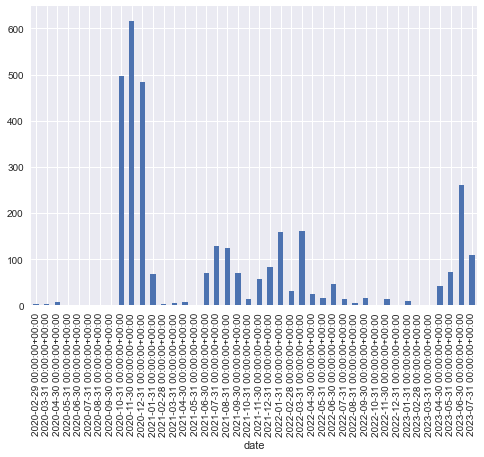

In [67]:
ballchasing_replays_info_df.xs(yip_id, level=1).id.pipe(lambda x:x[x.index>='2020-01-01']).resample('M').count().plot.bar()

In [19]:
def ownpow(a, b):
    if a >= 0:
        return a**b
    if a < 0:
        temp = abs(a)**b
        return -1*temp
ballchasing_replays_info_df['rank_div'] = ballchasing_replays_info_df['rank_tier'] + np.round((np.sin(0.25*np.pi*(ballchasing_replays_info_df['rank_division']-3)).apply(ownpow, b=1.4)+1)*0.5, 1)

<AxesSubplot:xlabel='date'>

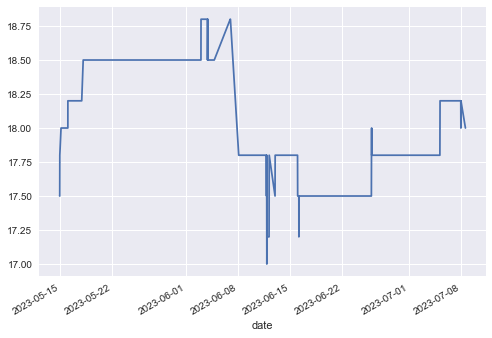

In [20]:
ballchasing_replays_info_df\
    .xs(yip_id, level=1).tail(400)\
        .query('playlist_id == "ranked-standard"')\
            .rank_div.ffill().plot()

In [69]:
ballchasing_replays_info_df.tail(6)

id  \
date                      id_id                                                                    
2023-07-09 00:27:50+00:00 176842f84ccd4c9794cd7ef9b4454c48  c58a4f7f-10c3-4503-984c-9abc9a2d0af1   
                          e748b069f4010900                  c58a4f7f-10c3-4503-984c-9abc9a2d0af1   
                          76561198140922242                 c58a4f7f-10c3-4503-984c-9abc9a2d0af1   
                          76561198130159120                 c58a4f7f-10c3-4503-984c-9abc9a2d0af1   
                          90cf5924181a434ebde4213b565a6208  c58a4f7f-10c3-4503-984c-9abc9a2d0af1   
                          76561198208791963                 c58a4f7f-10c3-4503-984c-9abc9a2d0af1   

                                                                                                         link  \
date                      id_id                                                                                 
2023-07-09 00:27:50+00:00 176842f84ccd4c9794cd7ef9b4454c48  https://ballchasing.com/api/replays/c58a4f7f-1...   
                          e748b069f4010900                  https://ballchasing.com/api/replays/c58a4f7f-1...   
                          76561198140922242                 https://ballchasing.com/api/replays/c58a4f7f-1...   
                          76561198130159120                 https://ballchasing.com/api/replays/c58a4f7f-1...   
                          90cf5924181a434ebde4213b565a6208  https://ballchasing.com/api/replays/c58a4f7f-1...   
                          76561198208791963                 https://ballchasing.com/api/replays/c58a4f7f-1...   

                                                                                created  \
date                      id_id                                                           
2023-07-09 00:27:50+00:00 176842f84ccd4c9794cd7ef9b4454c48  2023-07-09T00:28:03.446378Z   
                          e748b069f4010900                  2023-07-09T00:28:03.446378Z   
                          76561198140922242                 2023-07-09T00:28:03.446378Z   
                          76561198130159120                 2023-07-09T00:28:03.446378Z   
                          90cf5924181a434ebde4213b565a6208  2023-07-09T00:28:03.446378Z   
                          76561198208791963                 2023-07-09T00:28:03.446378Z   

                                                           status  \
date                      id_id                                     
2023-07-09 00:27:50+00:00 176842f84ccd4c9794cd7ef9b4454c48     ok   
                          e748b069f4010900                     ok   
                          76561198140922242                    ok   
                          76561198130159120                    ok   
                          90cf5924181a434ebde4213b565a6208     ok   
                          76561198208791963                    ok   

                                                                                  match_guid  \
date                      id_id                                                                
2023-07-09 00:27:50+00:00 176842f84ccd4c9794cd7ef9b4454c48  83AAD24411EE1DEE702D798F3A52CFAC   
                          e748b069f4010900                  83AAD24411EE1DEE702D798F3A52CFAC   
                          76561198140922242                 83AAD24411EE1DEE702D798F3A52CFAC   
                          76561198130159120                 83AAD24411EE1DEE702D798F3A52CFAC   
                          90cf5924181a434ebde4213b565a6208  83AAD24411EE1DEE702D798F3A52CFAC   
                          76561198208791963                 83AAD24411EE1DEE702D798F3A52CFAC   

                                                                                                     title  \
date                      id_id                                                                              
2023-07-09 00:27:50+00:00 176842f84ccd4c9794cd7ef9b4454c48  2023-07-08.21.27 Yippie37 Ranked Standard Loss   
       

In [ ]:
df['my_goal_diff'] = np.where(df.isOrange == 0,
                              df.gameMetadata_score_team0Score - df.gameMetadata_score_team1Score,
                              df.gameMetadata_score_team1Score - df.gameMetadata_score_team0Score)

In [ ]:
df['win'] = df['my_goal_diff'] > 0

In [ ]:
df['big_score'] = abs(df['my_goal_diff']) >= 4

In [ ]:
df = df.create_factors()
solo = df[df.gameMetadata_playlist == 'RANKED_DUELS'].create_factors()
doubles = df[df.gameMetadata_playlist == 'RANKED_DOUBLES'].create_factors()
standard = df[df.gameMetadata_playlist == 'RANKED_STANDARD'].create_factors()
tournament = df[df.gameMetadata_playlist == 'UNKNOWN'].iloc[1:].create_factors()

In [ ]:
# Creo all_players (standard)
# p = []
# for row in tqdm(standard.iterrows(), total=len(standard)):
#     try:
#         p.append(row[1].get_players())
#     except:
#         next
# all_players = pd.concat(p)
# SaveList(all_players, 'all_players.list')

all_players = LoadList('all_players.list')

In [ ]:
all_players_games = all_players.groupby('game').apply(lambda x:x.groupby('isOrange').mean().iloc[0] - x.groupby('isOrange').mean().iloc[1])

## Analysis

### All-time stats

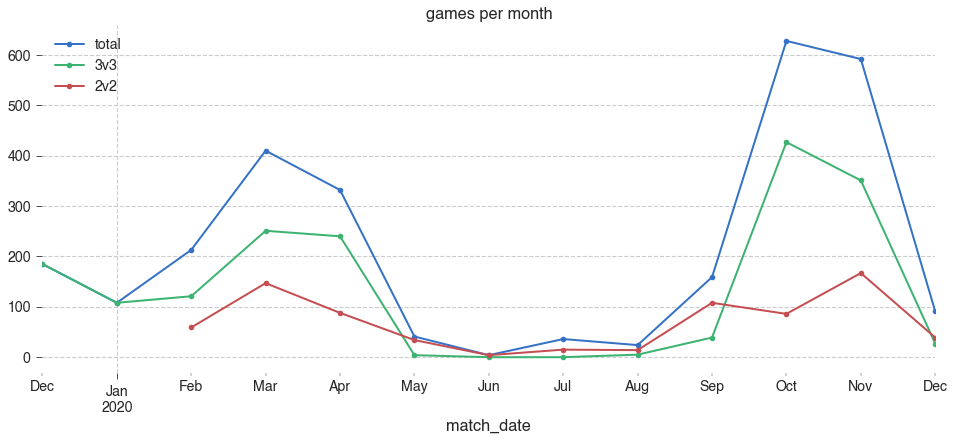

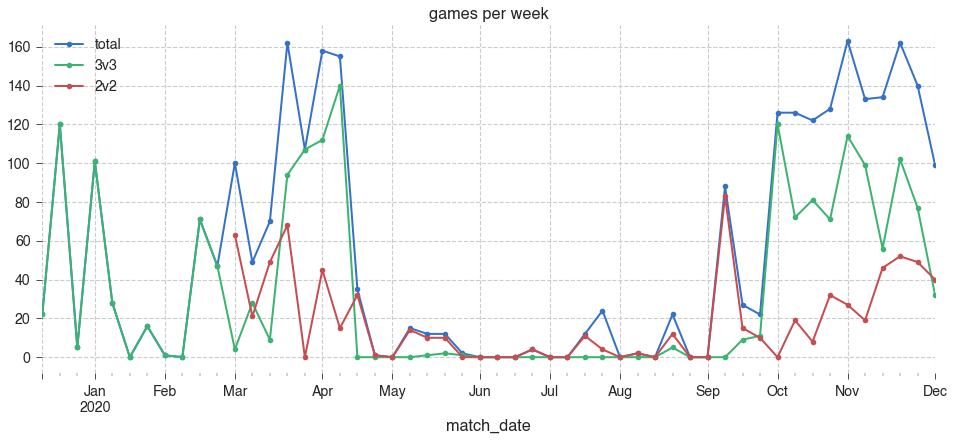

In [ ]:
# Playing frequency
df.resample("m").count().iloc[:, 0].plot(marker='o', title='games per month', label='total')
standard.resample("m").count().iloc[:, 0].plot(marker='o', title='games per month', label='3v3')
doubles.resample("m").count().iloc[:, 0].plot(marker='o', title='games per month', label='2v2')
plt.legend()
plt.show()
df.resample("w").count().iloc[:, 0].plot(marker='o', title='games per week', label='total')
standard.resample("w").count().iloc[:, 0].plot(marker='o', title='games per week', label='3v3')
doubles.resample("w").count().iloc[:, 0].plot(marker='o', title='games per week', label='2v2')
plt.legend()
plt.show()

In [ ]:
# Candlestick graph of standard mmr
standard.my_mmr.resample('2d').agg(['first', 'max', 'min', 'last'])\
.iplot(kind='candle',
       open='first',
       high='max',
       low='min',
       close='last',
       title='Standard MMR',
       layout={'template':'plotly_dark'})

In [ ]:
standard.my_mmr

match_date
2019-12-11 21:36:11-03:00    1137.0
2019-12-11 21:44:00-03:00    1146.0
2019-12-11 21:52:49-03:00    1156.0
2019-12-11 21:58:17-03:00    1165.0
2019-12-11 22:09:16-03:00    1156.0
                              ...  
2020-12-04 23:32:57-03:00    1511.0
2020-12-04 23:40:57-03:00    1521.0
2020-12-05 00:17:37-03:00    1511.0
2020-12-05 00:27:36-03:00    1520.0
2020-12-05 00:36:07-03:00    1512.0
Name: my_mmr, Length: 1758, dtype: float64

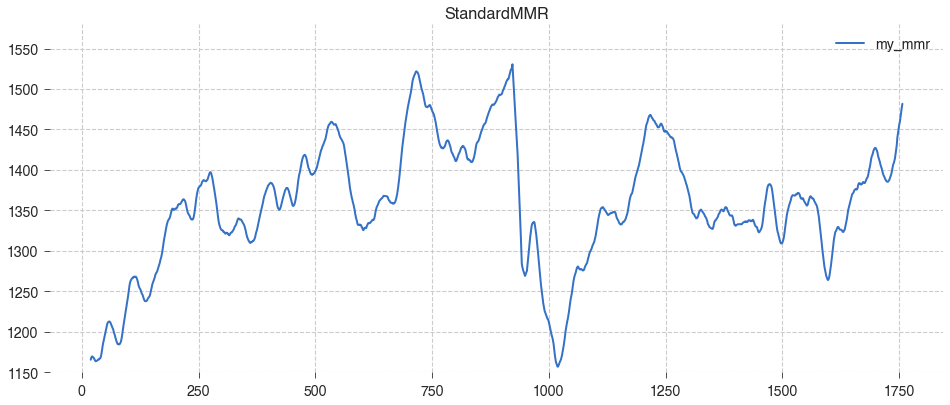

In [ ]:
# Standard and doubles mmr
t='2d'
standard.my_mmr.reset_index().rolling(20).mean().plot(label='3v3')
plt.title('StandardMMR')
plt.legend()
plt.ylim(1150, 1580)
del(t)

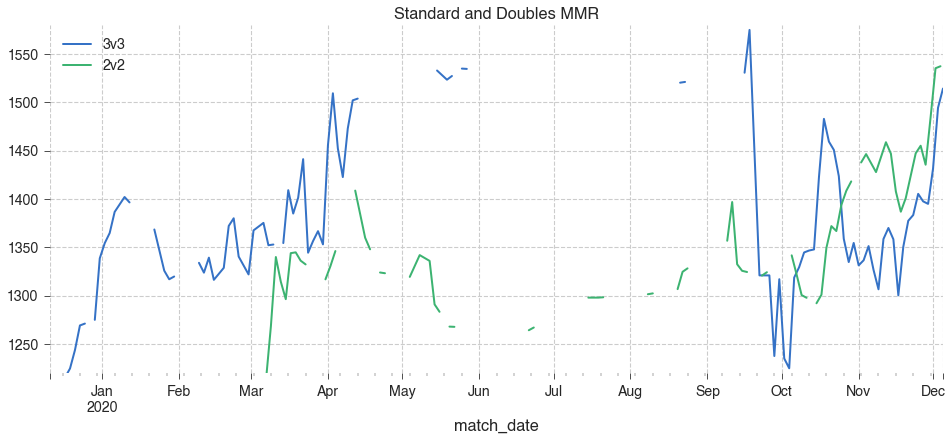

In [ ]:
# Standard and doubles mmr
t='2d'
standard.my_mmr.resample(t).mean().interpolate(limit=1).plot(label='3v3')
doubles.my_mmr.resample(t).mean().interpolate(limit=1).plot(label='2v2')
plt.title('Standard and Doubles MMR')
plt.legend()
plt.ylim(1220, 1580)
del(t)

In [ ]:
# MMR Gap
standard.my_mmr.resample('w').agg(['max', 'median', 'min']).interpolate(limit=1)\
.iplot(layout={'template':'plotly_dark'})

# plt.title('Standard MMR weekly gap')
# plt.ylim(1100, 1600)

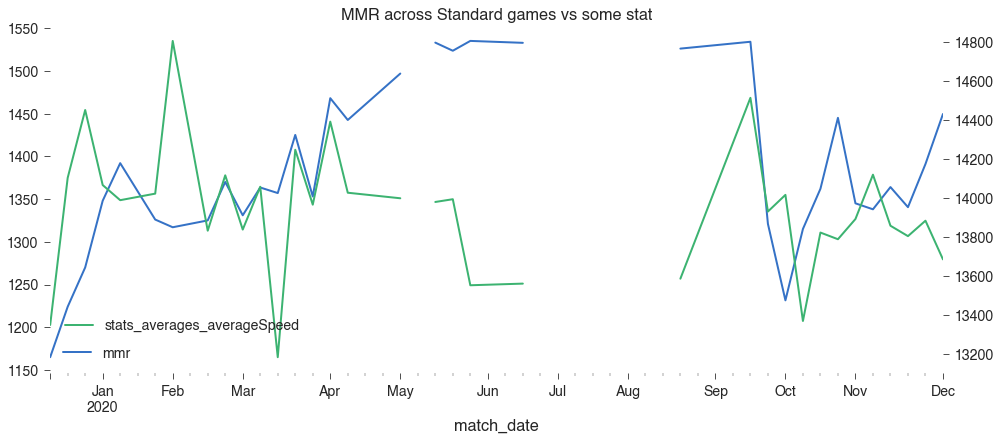

In [ ]:
# MMR vs stat over time
f, ax = plt.subplots()
t='w'
standard.my_mmr.resample(t).median().interpolate(limit=3)\
.plot(kind='line', ax=ax, grid=False)
ax2 = ax.twinx()
standard.stats_averages_averageSpeed.resample(t).median().interpolate(limit=3)\
.plot(ax=ax2, grid=False, color='C1')

plt.title('MMR across Standard games vs some stat')
ax.legend(loc=3, labels=['mmr'])
ax2.legend(loc=[0.01, 0.1])
plt.show()
del(t)

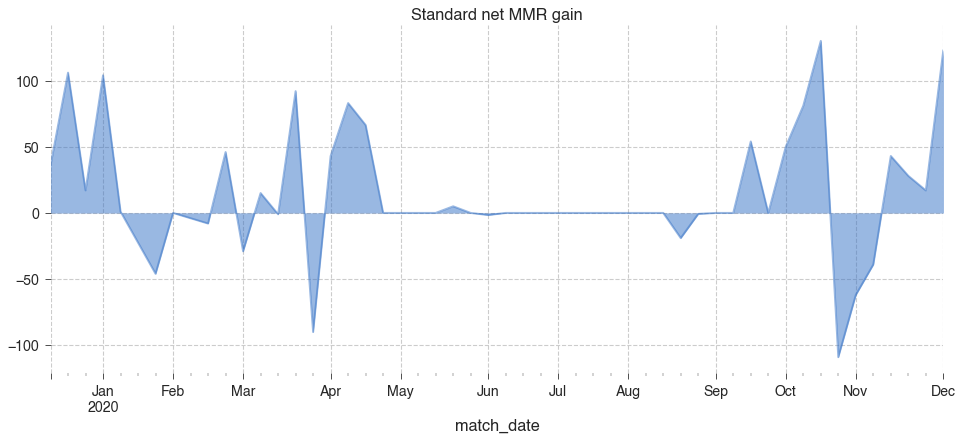

In [ ]:
# MMR gain
t='w'
(standard.my_mmr.resample(t).last().interpolate(limit=1) - \
 standard.my_mmr.resample(t).first().interpolate(limit=1))\
.plot(kind='area', stacked=False, title='Standard net MMR gain')
del(t)

<AxesSubplot:>

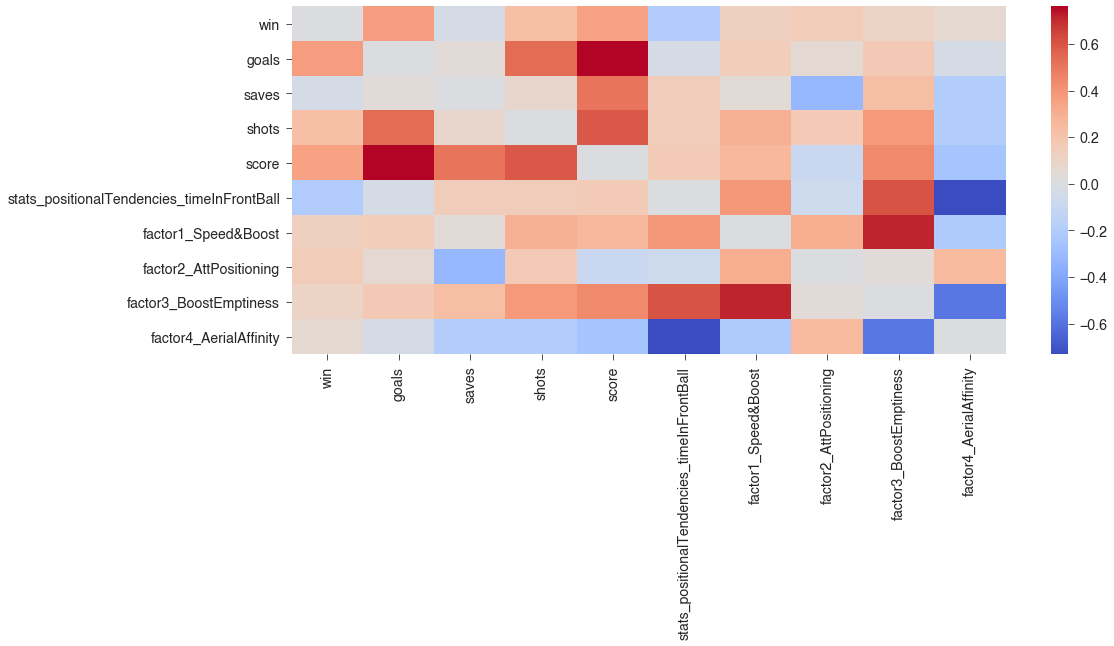

In [ ]:
# Correlations

sns.heatmap(pd.concat([standard[['win', 'goals', 'saves', 'shots', 'score',
                                 'stats_positionalTendencies_timeInFrontBall']],
                       standard.filter(like='factor')],
                       axis=1).corr().replace(1, 0), cmap='coolwarm')

In [4]:
def ProcessTrainingDf(df, preprocess=True, normalize_time=True, high_corr=True, scale='standard'):
    
    df = df.copy(deep=True)
    
    if preprocess:
        df = df.drop_duplicates().dropna().query('mmr != 0')._get_numeric_data()
        df = df[df.time_in_game > 90]
        df = df.loc[:, 'total_hits':].join(df.mmr)
    
    if normalize_time:
        # Normalize time-based stats to 300 seconds game
        dont_divide = 'id,rank,division,mmr,is_orange,win,field_of_view,transition_speed,pitch,swivel_speed,stiffness,height,distance,car,average_speed,average_hit_distance,average_distance_from_center,average_boost_level,is_keyboard,is_bot,first_frame_in_game'.split(',')
        df = df.apply(lambda x:x if x.name in dont_divide else x/df.time_in_game*300)
        
    df = df.drop(columns=['time_in_game', 'is_bot', 'first_frame_in_game', 'is_keyboard'], errors='ignore')

    if high_corr:
        # Check high correlations and remove them
        # for idx, data in df.corr().replace(1, 0).iterrows():
        #      print(idx, data[abs(data) > 0.6].index.values)
        high_corr = 'total_dribble_conts,time_at_boost_speed,time_at_slow_speed,wasted_big,wasted_small,time_in_attacking_half,time_in_attacking_third,time_in_front_ball,time_in_front_of_center_of_mass,time_most_forward_player,ball_hit_backward'.split(',')
        df.drop(columns=high_corr, inplace=True)

#     if stratify:
#         # Only leave samples in which rank is frequent (>10)
#         df = df.groupby('rank').filter(lambda x:len(x)>10)
        
    #Scale and split    
    from sklearn.preprocessing import StandardScaler, RobustScaler    
    if scale=='standard':
        scaler = StandardScaler()
        df[:] = scaler.fit_transform(df)
    elif scale=='robust':
        scaler = RobustScaler()
        df[:] = scaler.fit_transform(df)
    elif scale is None:
        pass
    else:
        raise Exception("scale must be 'standard', 'robust', or None")
        
    return df

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       232
         1.0       0.87      0.83      0.85       203

    accuracy                           0.86       435
   macro avg       0.86      0.86      0.86       435
weighted avg       0.86      0.86      0.86       435



<AxesSubplot:>

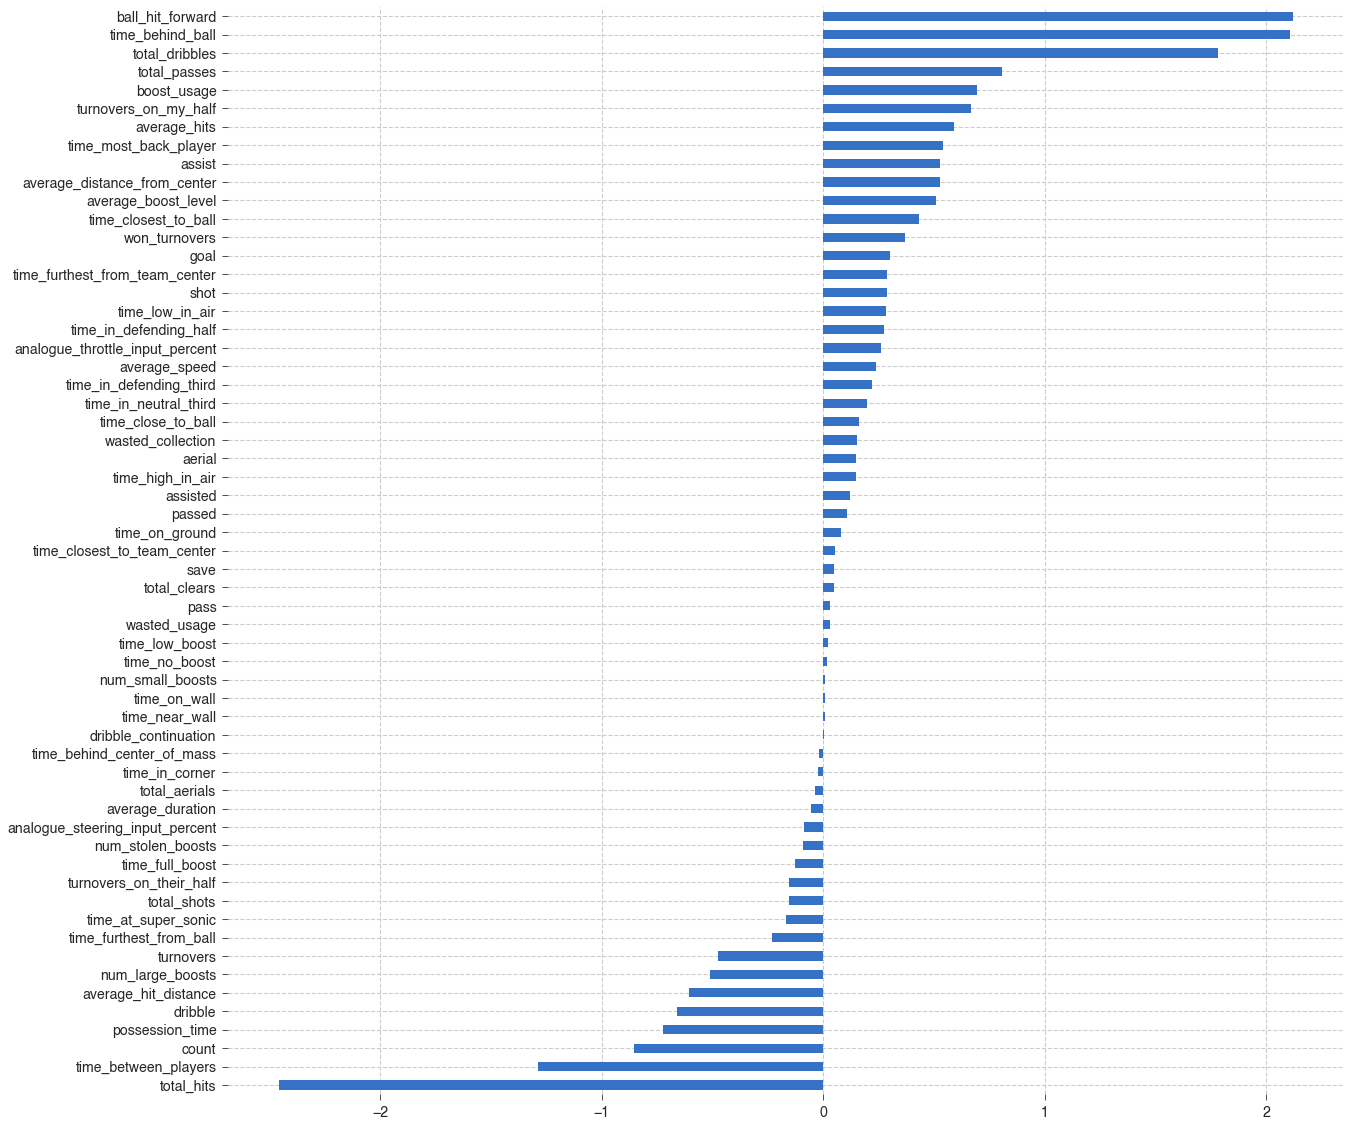

In [ ]:
# Predicción de quién gana según los stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
apg_train = pd.concat([all_players_games.loc[:, "stats_boost_boostUsage":"stats_perPossessionStats_count"],
           all_players_games.win], axis=1).dropna()
apg_train.win = apg_train.win.replace(-1, 0)
xtrain, xtest, ytrain, ytest = train_test_split(ProcessTrainingDf(apg_train.to_snake(), preprocess=False, normalize_time=False, high_corr=True).drop(columns='win'),
                                                apg_train.win,
                                                random_state=37)
model = LogisticRegression()
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
from sklearn.metrics import classification_report    
print(classification_report(ytest, preds))

pd.Series(model.coef_[0], index=xtrain.columns).sort_values().plot.barh(figsize=(20, 20))

name
.                                  0.457627
Yip37                              0.532946
Yip37 - chat off, take the shot    0.540984
chat off                           0.561728
chat off - take the shot           0.492424
spoop                              0.451613
spoopYip                           0.333333
spoopy                             1.000000
spoopy .                           0.333333
zenforest-                         0.466667
Name: win, dtype: float64

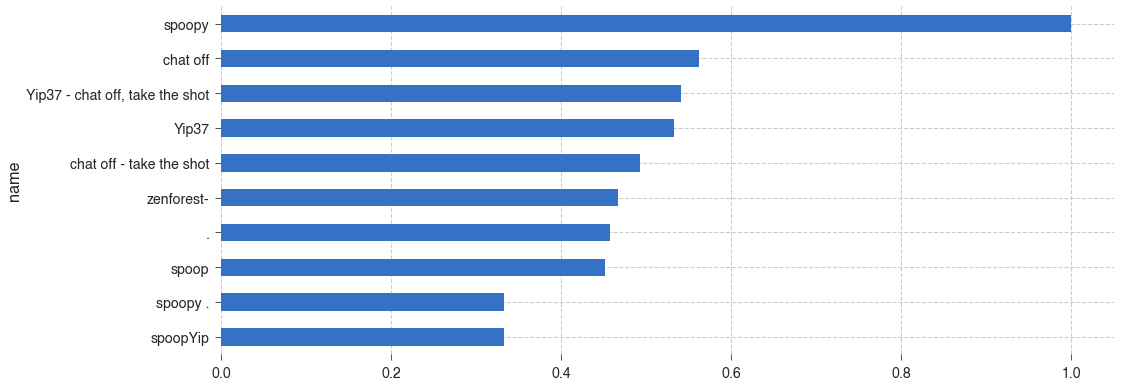

In [ ]:
# Win percentage by name
display(standard.groupby('name').mean()['win'])
standard.groupby('name').mean()['win'].sort_values().plot.barh()
plt.show()

### Individual games/days

In [ ]:
today = datetime.date.today().strftime("%Y-%m-%d")
yesterday = (datetime.date.today()-datetime.timedelta(days=1)).strftime("%Y-%m-%d")
last_replay_day = df.iloc[-1].name.date().strftime("%Y-%m-%d")
now = datetime.datetime.today().strftime("%Y-%m-%d %H:%M")
twentyfourhours = (datetime.datetime.today()-datetime.timedelta(days=1)).strftime("%Y-%m-%d")

In [ ]:
standard.resample('d').median().loc[["2020-04-01", "2020-10-23", last_replay_day]].plot_radar()

In [ ]:
standard.loc["2020-04-01"].plot_line()
standard.loc[twentyfourhours:now].plot_line()

In [ ]:
standard.loc[twentyfourhours:now].plot_line('mmr')

KeyError: "['predicted_mmr'] not in index"

In [ ]:
# Resto de los players vs Yip 

all_players[all_players.id_id != yip_id].iloc[-20:].filter(like='factor').mean().plot.bar()

In [ ]:
standard['day'] = standard.index.to_series().apply(lambda x:pd.to_datetime(str(x)[:10]))
px.box(data_frame=standard.iloc[-100:], x='day', y='mean_mmr')

In [ ]:
tournament['day'] = tournament.index.to_series().apply(lambda x:pd.to_datetime(str(x)[:10]))
px.box(data_frame=tournament, x='day', y='predicted_mmr')

### Load Factors

In [ ]:
df.filter(like='gameStats_').columns.values

In [ ]:
factors_df = pd.read_csv('curated_factor_loadings.csv', index_col=0)
# factors_df.index = factors_df.index.to_series().apply(lambda x:x.split('_', 1)[-1])
factors_df.index
# for factor in factors_df.index:
#     print(df.filter(like=factor).columns)

## Ranks ML

### Training data request

In [5]:
training_data_old = LoadList('training_data_old.list')
training_cols = LoadList('training_columns.list')
training_df_old = pd.DataFrame(columns=training_cols, data=training_data_old)
training_df_old.head(2)

,id,name,player,game,rank,division,mmr,is_orange,win,score,goals,assists,saves,shots,field_of_view,transition_speed,pitch,swivel_speed,stiffness,height,distance,car,total_hits,total_dribbles,total_dribble_conts,total_saves,total_goals,total_shots,total_passes,total_aerials,turnovers,turnovers_on_my_half,turnovers_on_their_half,won_turnovers,possession_time,average_speed,average_hit_distance,average_distance_from_center,boost_usage,num_small_boosts,num_large_boosts,num_stolen_boosts,wasted_collection,wasted_usage,time_full_boost,time_low_boost,time_no_boost,average_boost_level,wasted_big,wasted_small,time_on_ground,time_low_in_air,time_high_in_air,time_in_defending_half,time_in_attacking_half,time_in_defending_third,time_in_neutral_third,time_in_attacking_third,time_behind_ball,time_in_front_ball,time_closest_to_ball,time_furthest_from_ball,time_close_to_ball,time_near_wall,time_in_corner,ball_hit_forward,ball_hit_backward,is_keyboard,time_ballcam,time_handbrake,time_at_boost_speed,time_at_slow_speed,time_at_super_sonic,time_closest_to_team_center,time_furthest_from_team_center,num_demos_inflicted,num_demos_taken,is_bot,first_frame_in_game,time_in_game,time_in_front_of_center_of_mass,time_behind_center_of_mass,time_most_forward_player,time_most_back_player,time_between_players
0,77338667,TOO OLD,76561198250641772,8DB3CC6C11EB18081D94CA847D913D63,15.0,2,1185.0,True,False,92,0,0,0,5,110,1.0,-3,5,0.45,120,260,4770,23,2,2,0,0,4,4,5,7,1,3,4,49.233624,15318.795898,2731.638428,2134.654297,2858.091483,50,22,5,456.494232,477.553375,10.149828,79.353645,31.194462,51.052635,447.822357,8.671875,191.796173,104.676437,10.719720,181.199997,132.034180,126.875305,110.391159,75.967720,215.635742,97.598450,36.636768,56.649471,15.373092,56.782112,5.738556,30602.589573,6187.059978,False,276.539825,12.830756,184.437363,24.766321,42.389793,68.642952,9.573999,2,0,False,1,313.234192,165.052887,148.181290,120.018005,100.249031,92.967155
1,77338665,Term LFT,76561198221370128,8DB3CC6C11EB18081D94CA847D913D63,15.0,2,1197.0,True,False,218,0,0,1,2,110,1.0,-2,7,0.40,110,260,23,33,5,5,0,0,2,4,3,6,3,2,4,68.616094,15055.208984,3146.865479,1972.462158,2368.990637,57,19,5,360.610596,244.493408,24.717108,87.193237,26.994349,50.425682,352.329346,8.281250,206.051804,89.295853,8.762689,190.154495,123.079697,135.561020,100.858414,76.814751,240.373795,72.860397,75.086891,26.743584,19.430952,47.335335,7.984416,62155.300083,11165.100094,True,274.424561,9.039788,165.067688,18.081558,30.796070,83.350601,5.634082,0,0,False,1,313.234192,169.089951,144.144241,124.899864,85.864052,102.470276


In [6]:
training_df_raw = pd.read_csv('training_df.csv', index_col=0)
training_df_raw.head(2)

,id,name,player,game,rank,division,mmr,is_orange,win,score,goals,assists,saves,shots,field_of_view,transition_speed,pitch,swivel_speed,stiffness,height,distance,car,total_hits,total_dribbles,total_dribble_conts,total_saves,total_goals,total_shots,total_passes,total_aerials,turnovers,turnovers_on_my_half,turnovers_on_their_half,won_turnovers,possession_time,average_speed,average_hit_distance,average_distance_from_center,boost_usage,num_small_boosts,num_large_boosts,num_stolen_boosts,wasted_collection,wasted_usage,time_full_boost,time_low_boost,time_no_boost,average_boost_level,wasted_big,wasted_small,time_on_ground,time_low_in_air,time_high_in_air,time_in_defending_half,time_in_attacking_half,time_in_defending_third,time_in_neutral_third,time_in_attacking_third,time_behind_ball,time_in_front_ball,time_closest_to_ball,time_furthest_from_ball,time_close_to_ball,time_near_wall,time_in_corner,ball_hit_forward,ball_hit_backward,is_keyboard,time_ballcam,time_handbrake,time_at_boost_speed,time_at_slow_speed,time_at_super_sonic,time_closest_to_team_center,time_furthest_from_team_center,num_demos_inflicted,num_demos_taken,is_bot,first_frame_in_game,time_in_game,time_in_front_of_center_of_mass,time_behind_center_of_mass,time_most_forward_player,time_most_back_player,time_between_players
0,76799771,White sus,76561198258089118,51C14D8611EB15762F13FBB4BB5F3690,16.0,0,1223.0,False,False,323,0,1,3,1,108,1.0,-4,4,0.45,90,290,23,24,5,6,4,0,0,2,6,8,7,0,5,45.267200,14216.742188,2013.758545,1950.547607,1685.598643,40,14,1,211.624908,162.172073,25.200331,75.434669,30.400419,52.186752,207.874908,3.750000,154.469009,98.502007,8.300088,215.703445,61.767841,179.669373,68.001099,29.800814,191.569977,85.901314,51.267387,33.100552,24.333607,67.067535,4.333382,36837.309174,1010.970100,True,223.337219,27.467066,138.636139,26.233671,24.733696,75.001602,13.700168,0,0,False,1,277.471283,119.335152,158.136124,83.467941,107.034790,86.968552
1,76799770,AluRa,76561198022365568,51C14D8611EB15762F13FBB4BB5F3690,16.0,0,1225.0,False,False,188,0,0,1,0,110,1.0,-4,7,0.35,90,270,23,21,1,1,0,0,0,2,4,9,6,3,1,34.133836,13244.471680,2140.025146,1911.801514,1214.439276,32,9,0,115.982315,123.560081,31.467276,115.768417,39.400658,40.098049,111.841690,4.140625,162.135803,101.201920,4.866790,214.669952,62.801331,171.669403,73.167664,32.634209,184.270096,93.201180,47.967373,31.000441,20.466965,63.034271,3.933374,29876.350128,3727.120056,False,257.237640,17.166878,104.801987,29.567144,7.933432,75.734413,13.166830,0,0,False,1,277.471283,120.301811,157.169479,81.734520,94.435364,101.301399


In [7]:
training_info_list = LoadList('training_info_list.list')

training_info_df = pd.json_normalize(training_info_list, sep='_')
training_df_raw = pd.merge(training_df_raw, training_info_df[['gameMetadata_matchGuid', 'gameMetadata_serverName']], left_on='game', right_on='gameMetadata_matchGuid')
training_df_raw['server_abb'] = training_df_raw['gameMetadata_serverName'].apply(lambda x:x[:2])

display(training_df_raw.head(2))
training_df_raw.shape

,id,name,player,game,rank,division,mmr,is_orange,win,score,goals,assists,saves,shots,field_of_view,transition_speed,pitch,swivel_speed,stiffness,height,distance,car,total_hits,total_dribbles,total_dribble_conts,total_saves,total_goals,total_shots,total_passes,total_aerials,turnovers,turnovers_on_my_half,turnovers_on_their_half,won_turnovers,possession_time,average_speed,average_hit_distance,average_distance_from_center,boost_usage,num_small_boosts,num_large_boosts,num_stolen_boosts,wasted_collection,wasted_usage,time_full_boost,time_low_boost,time_no_boost,average_boost_level,wasted_big,wasted_small,time_on_ground,time_low_in_air,time_high_in_air,time_in_defending_half,time_in_attacking_half,time_in_defending_third,time_in_neutral_third,time_in_attacking_third,time_behind_ball,time_in_front_ball,time_closest_to_ball,time_furthest_from_ball,time_close_to_ball,time_near_wall,time_in_corner,ball_hit_forward,ball_hit_backward,is_keyboard,time_ballcam,time_handbrake,time_at_boost_speed,time_at_slow_speed,time_at_super_sonic,time_closest_to_team_center,time_furthest_from_team_center,num_demos_inflicted,num_demos_taken,is_bot,first_frame_in_game,time_in_game,time_in_front_of_center_of_mass,time_behind_center_of_mass,time_most_forward_player,time_most_back_player,time_between_players,gameMetadata_matchGuid,gameMetadata_serverName,server_abb
0,76799771,White sus,76561198258089118,51C14D8611EB15762F13FBB4BB5F3690,16.0,0,1223.0,False,False,323,0,1,3,1,108,1.0,-4,4,0.45,90,290,23,24,5,6,4,0,0,2,6,8,7,0,5,45.267200,14216.742188,2013.758545,1950.547607,1685.598643,40,14,1,211.624908,162.172073,25.200331,75.434669,30.400419,52.186752,207.874908,3.750000,154.469009,98.502007,8.300088,215.703445,61.767841,179.669373,68.001099,29.800814,191.569977,85.901314,51.267387,33.100552,24.333607,67.067535,4.333382,36837.309174,1010.970100,True,223.337219,27.467066,138.636139,26.233671,24.733696,75.001602,13.700168,0,0,False,1,277.471283,119.335152,158.136124,83.467941,107.034790,86.968552,51C14D8611EB15762F13FBB4BB5F3690,EU799776,EU
1,76799770,AluRa,76561198022365568,51C14D8611EB15762F13FBB4BB5F3690,16.0,0,1225.0,False,False,188,0,0,1,0,110,1.0,-4,7,0.35,90,270,23,21,1,1,0,0,0,2,4,9,6,3,1,34.133836,13244.471680,2140.025146,1911.801514,1214.439276,32,9,0,115.982315,123.560081,31.467276,115.768417,39.400658,40.098049,111.841690,4.140625,162.135803,101.201920,4.866790,214.669952,62.801331,171.669403,73.167664,32.634209,184.270096,93.201180,47.967373,31.000441,20.466965,63.034271,3.933374,29876.350128,3727.120056,False,257.237640,17.166878,104.801987,29.567144,7.933432,75.734413,13.166830,0,0,False,1,277.471283,120.301811,157.169479,81.734520,94.435364,101.301399,51C14D8611EB15762F13FBB4BB5F3690,EU799776,EU


(5999, 88)

In [12]:
# Basic filters. NAs, numerics, time_in_game.
training_df = ProcessTrainingDf(training_df_raw, scale=None)
training_df.head(2)

,total_hits,total_dribbles,total_saves,total_goals,total_shots,total_passes,total_aerials,turnovers,turnovers_on_my_half,turnovers_on_their_half,won_turnovers,possession_time,average_speed,average_hit_distance,average_distance_from_center,boost_usage,num_small_boosts,num_large_boosts,num_stolen_boosts,wasted_collection,wasted_usage,time_full_boost,time_low_boost,time_no_boost,average_boost_level,time_on_ground,time_low_in_air,time_high_in_air,time_in_defending_half,time_in_defending_third,time_in_neutral_third,time_behind_ball,time_closest_to_ball,time_furthest_from_ball,time_close_to_ball,time_near_wall,time_in_corner,ball_hit_forward,time_ballcam,time_handbrake,time_at_super_sonic,time_closest_to_team_center,time_furthest_from_team_center,num_demos_inflicted,num_demos_taken,time_behind_center_of_mass,time_most_back_player,time_between_players,mmr
0,25.948631,5.405965,4.324772,0.0,0.0,2.162386,6.487158,8.649544,7.568351,0.000000,5.405965,48.942579,14216.742188,2013.758545,1950.547607,1822.457400,43.247719,15.136702,1.081193,228.807363,175.339305,27.246420,81.559434,32.868720,52.186752,167.010807,106.499677,8.973997,233.217048,194.257262,73.522310,207.124112,55.429939,35.788084,26.309324,72.512948,4.685222,39828.239645,241.470631,29.697198,26.741898,81.091205,14.812525,0.0,0.0,170.975665,115.725262,94.029786,1223.0
1,22.705052,1.081193,0.000000,0.0,0.0,2.162386,4.324772,9.730737,6.487158,3.243579,1.081193,36.905263,13244.471680,2140.025146,1911.801514,1313.043206,34.598175,9.730737,0.000000,125.399263,133.592291,34.022197,125.167999,42.599714,40.098049,175.300090,109.418804,5.261939,232.099643,185.607751,79.108363,199.231532,51.861986,33.517458,22.128738,68.152211,4.252737,32302.099673,278.123528,18.560708,8.577571,81.883515,14.235884,0.0,0.0,169.930536,102.102851,109.526361,1225.0


<AxesSubplot:>

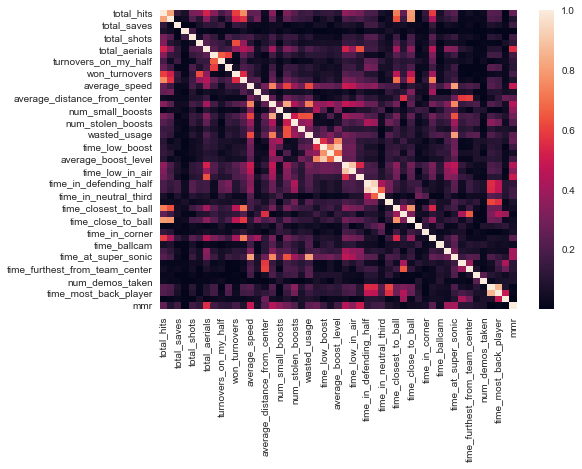

In [20]:
sns.heatmap(training_df.corr().abs())

In [16]:
model = LoadList('mmr_ARD_model.model')

c:\Users\leo_a\anaconda3\envs\carball\lib\site-packages\sklearn\base.py:315: UserWarning:

Trying to unpickle estimator ARDRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.



<AxesSubplot:title={'center':'Absolute value of correlation between mmr and stat'}>

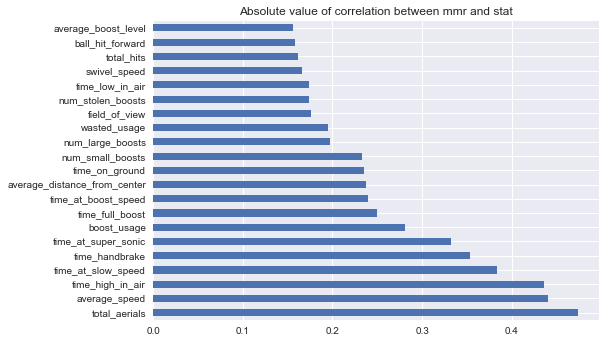

In [9]:
# Correlation between mmr and stats
training_df_raw.corr().mmr.abs().sort_values(ascending=False).iloc[2:23].plot.barh(title='Absolute value of correlation between mmr and stat')

### Model tests

In [ ]:
def TestModels(df, model, normalize_time=True, high_corr=True, stratify=True, scale='standard', k=5, target='mmr'):

    "Input a 'training_df' and a ML algorithm already called and get a r2 score. Can turn off processing with parameters."
    
    # Process
    df = ProcessTrainingDf(df, normalize_time=True, high_corr=True, scale=scale)
    
    # Split
    from sklearn.model_selection import train_test_split, KFold
    target = target
    x = df.drop(columns=[target, 'time_ballcam', 'time_handbrake'])
    y = df[target]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42)  
    
    # Choose model, train, and predict
    model = model
    try:
        model.fit(xtrain, ytrain, early_stopping_rounds=10, eval_metric='logloss', eval_set=[(xtest, ytest)], verbose=False)
    except:
        model.fit(xtrain, ytrain)
    finally:
        pass
#     print('best score', model.best_score_)
#     print('best params', model.best_params_)
    yhat = model.predict(xtest)
    
    # Plot feature importances
    try:
        pd.Series(model.feature_importances_, index=x.columns).sort_values().plot.barh(figsize=(20, 40))
    except:
        try:
            pd.Series(model.coef_, index=x.columns).sort_values().plot.barh(figsize=(20, 40))
        except:
            pass
        
    # Plot prediction power
    plt.figure(figsize=(8, 8))
    plt.scatter(ytest, yhat)
    plt.axis('scaled')
    if scale is not None:
        a, b = -3, 3
    else:
        a, b = 0, 2000
    plt.plot(range(a, b), range(a, b), color='k', ls='--')
    plt.xlim(a, b)
    plt.ylim(a, b)
    plt.show()
    
    # Evaluation
    from sklearn.metrics import mean_squared_error, r2_score
    print(mean_squared_error(ytest.values, yhat), r2_score(ytest.values, yhat))

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ARDRegression, LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.10, 0.115, 0.13, 0.15], #so called `eta` value
              'max_depth': [3, 4, 5],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50, 60]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs=2,
                        verbose=True)

TestModels(training_df_raw, ARDRegression())

In [ ]:
# Comparar training entre regions
# training_df_EU = ProcessTrainingDf(training_df_raw[training_df_raw.server_abb == 'EU'], scale=None)
# training_df_notEU = ProcessTrainingDf(training_df_raw[training_df_raw.server_abb != 'EU'], scale=None)
# training_df_US = ProcessTrainingDf(training_df_raw[training_df_raw.server_abb == 'US'], scale=None)
# training_df_SA = ProcessTrainingDf(training_df_raw[training_df_raw.server_abb == 'SA'], scale=None)

# xtrain, xtest, ytrain, ytest = training_df_EU.drop(columns='mmr'), training_df_SA.drop(columns='mmr'), training_df_EU.mmr, training_df_SA.mmr

# model.fit(xtrain, ytrain)

# yhat = model.predict(xtest)

# plt.figure(figsize=(8, 8))
# plt.scatter(ytest, yhat)
# plt.axis('scaled')
# a, b = 0, 2000
# plt.plot(range(a, b), range(a, b), color='k', ls='--')
# plt.xlim(a, b)
# plt.ylim(a, b)
# plt.show()

# pd.DataFrame(data=[yhat, ytest], index=['predicted_mmr', 'true_mmr'], ).T.apply(lambda x:x['predicted_mmr'] - x['true_mmr'], 1 )

# r2_score(yhat, ytest)

In [ ]:
# #KFold test 
# from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
# from sklearn.preprocessing import StandardScaler, RobustScaler
# from sklearn.metrics import r2_score

# target = 'mmr'
# training_df_standarized = training_df.copy()
# scaler = StandardScaler()
# training_df_standarized[:] = scaler.fit_transform(training_df)
# x = training_df_standarized.drop(columns=[target])
# y = training_df_standarized[target]

# scores = []
# kf = KFold(n_splits=4, shuffle=True, random_state=37)
# for i, (itrain, itest) in tqdm(enumerate(kf.split(training_df_standarized)), total=4):
#     xtrain, xtest, ytrain, ytest = x.iloc[itrain], x.iloc[itest], y.iloc[itrain], y.iloc[itest]
#     model = LinearRegression(fit_intercept=False)
#     model.fit(xtrain, ytrain)
#     yhat = model.predict(xtest)
#     scores.append(r2_score(ytest, yhat))
# scores = np.array(scores)
# print('r2 scores:', scores.round(4))
# print('Final r2 score:', scores.mean().round(4))

    Benchmark:  
    KFold:  
    r2 scores: [0.5886 0.5945 0.623  0.5942]  
    Final r2 score: 0.6001  
    ARD: (0.37394236611827214, 0.6203897459889335)

In [ ]:
# Some stat vs mmr
plt.figure(figsize=(8, 8))
plt.scatter(training_df.mmr, training_df.average_speed, alpha=0.1)
plt.show()

### Final model

In [42]:
 def PredictMMR(df, training_data, scale=None):
    df = df.copy(deep=True)
    df = df._get_numeric_data()
    df = pd.concat([df.filter(like='stats_'), df.timeInGame], 1)
    from stringcase import pascalcase, snakecase
    df.columns = df.columns.to_series().apply(lambda x:snakecase(x.split('_')[-1])).values
    df = ProcessTrainingDf(df, preprocess=False, high_corr=True, normalize_time=True, scale=None)
    
    training_data = ProcessTrainingDf(training_data, scale=None)
    training_data = training_data.drop(columns=['time_ballcam', 'total_goals', 'time_handbrake', 'num_demos_inflicted', 'num_demos_taken'])
    df = df.reindex(columns=training_data.columns).drop(columns='mmr')
    display("Missing values:", df.isna().sum()[df.isna().sum() > 0])
    df = df.fillna(method='pad')

    from sklearn.linear_model import ARDRegression
    model = ARDRegression()
    model.fit(training_data.drop(columns=['mmr']), training_data['mmr'])
    SaveList(model, 'mmr_ARD_model.model')

#     display(training_data.drop(columns='mmr'))
#     display(df)
    
#     test['predicted_mmr'] = model.predict(test)
    return model.predict(df)

In [47]:
model = LoadList('mmr_ARD_model.model')

c:\Users\leo_a\anaconda3\envs\carball\lib\site-packages\sklearn\base.py:315: UserWarning:

Trying to unpickle estimator ARDRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.



In [53]:
df_old.filter(like='stats_')

,stats_boost_boostUsage,stats_boost_numSmallBoosts,stats_boost_numLargeBoosts,stats_boost_wastedCollection,stats_boost_wastedUsage,stats_boost_timeFullBoost,stats_boost_timeLowBoost,stats_boost_timeNoBoost,stats_boost_numStolenBoosts,stats_boost_averageBoostLevel,stats_boost_wastedBig,stats_boost_wastedSmall,stats_distance_ballHitForward,stats_distance_ballHitBackward,stats_distance_timeClosestToBall,stats_distance_timeFurthestFromBall,stats_distance_timeCloseToBall,stats_distance_timeClosestToTeamCenter,stats_distance_timeFurthestFromTeamCenter,stats_possession_possessionTime,stats_possession_turnovers,stats_possession_turnoversOnMyHalf,stats_possession_turnoversOnTheirHalf,stats_possession_wonTurnovers,stats_positionalTendencies_timeOnGround,stats_positionalTendencies_timeLowInAir,stats_positionalTendencies_timeHighInAir,stats_positionalTendencies_timeInDefendingHalf,stats_positionalTendencies_timeInAttackingHalf,stats_positionalTendencies_timeInDefendingThird,stats_positionalTendencies_timeInNeutralThird,stats_positionalTendencies_timeInAttackingThird,stats_positionalTendencies_timeBehindBall,stats_positionalTendencies_timeInFrontBall,stats_positionalTendencies_timeNearWall,stats_positionalTendencies_timeInCorner,stats_positionalTendencies_timeOnWall,stats_averages_averageSpeed,stats_averages_averageHitDistance,stats_averages_averageDistanceFromCenter,stats_hitCounts_totalHits,stats_hitCounts_totalPasses,stats_hitCounts_totalSaves,stats_hitCounts_totalDribbles,stats_hitCounts_totalDribbleConts,stats_hitCounts_totalAerials,stats_hitCounts_totalClears,stats_controller_isKeyboard,stats_controller_analogueSteeringInputPercent,stats_controller_analogueThrottleInputPercent,stats_speed_timeAtSlowSpeed,stats_speed_timeAtSuperSonic,stats_speed_timeAtBoostSpeed,stats_relativePositioning_timeInFrontOfCenterOfMass,stats_relativePositioning_timeBehindCenterOfMass,stats_relativePositioning_timeMostForwardPlayer,stats_relativePositioning_timeMostBackPlayer,stats_relativePositioning_timeBetweenPlayers,stats_perPossessionStats_averageCounts_pass,stats_perPossessionStats_averageCounts_passed,stats_perPossessionStats_averageCounts_dribble,stats_perPossessionStats_averageCounts_dribbleContinuation,stats_perPossessionStats_averageCounts_shot,stats_perPossessionStats_averageCounts_goal,stats_perPossessionStats_averageCounts_assist,stats_perPossessionStats_averageCounts_assisted,stats_perPossessionStats_averageCounts_save,stats_perPossessionStats_averageCounts_aerial,stats_perPossessionStats_averageDuration,stats_perPossessionStats_averageHits,stats_perPossessionStats_count,stats_ballCarries_totalCarries,stats_ballCarries_totalFlicks,stats_ballCarries_longestCarry,stats_ballCarries_furthestCarry,stats_ballCarries_totalCarryTime,stats_ballCarries_averageCarryTime,stats_ballCarries_fastestCarrySpeed,stats_ballCarries_totalCarryDistance,stats_ballCarries_carryStats_averageZDistance,stats_ballCarries_carryStats_averageXyDistance,stats_ballCarries_carryStats_averageBallZVelocity,stats_ballCarries_carryStats_varianceXyDistance,stats_ballCarries_carryStats_varianceZDistance,stats_ballCarries_carryStats_varianceBallZVelocity,stats_ballCarries_carryStats_averageCarrySpeed,stats_ballCarries_carryStats_distanceAlongPath,stats_kickoffStats_totalKickoffs,stats_kickoffStats_numTimeBoost,stats_kickoffStats_numTimeCheat,stats_kickoffStats_averageBoostUsed,stats_demoStats_numDemosInflicted,stats_demoStats_numDemosTaken,stats_kickoffStats_numTimeGoToBall,stats_kickoffStats_numTimeFirstTouch,stats_hitCounts_totalGoals,stats_hitCounts_totalShots,stats_kickoffStats_numTimeAfk,stats_kickoffStats_numTimeDefend,stats_controller_timeBallcam,stats_controller_timeHandbrake,stats_rumbleStats_rumbleItems,stats_dropshotStats_totalDamage,stats_dropshotStats_damageEfficiency
match_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-11 21:36:11-03:00,1662.564797,61.0,14.0,447.862305,170.544922,27.747150,45.101452,1

In [51]:
model.

array([ 1.41104820e+01, -6.08241000e+00,  1.76725269e+01,  1.92212292e-01,
        2.27831188e+00,  1.82592530e+01,  0.00000000e+00,  5.94102518e+00,
        7.47431244e-01,  3.71592569e+00, -5.32446081e+00,  1.59261515e-02,
        0.00000000e+00,  1.50627649e-01,  7.35737478e-02,  3.28971105e+00,
        2.57705168e-02,  7.05688133e+00, -1.88886216e-02, -2.36497041e-01,
        4.20987519e-03,  8.52092249e-04, -2.17641583e+00, -2.22262960e+00,
       -1.88964726e+00,  8.97910066e-04,  7.97636281e+00,  3.72790729e-01,
        9.98404245e-04,  1.66882922e+00, -1.55723214e-03, -3.89654163e+00,
       -2.05891228e+00, -4.96458763e+00, -7.81744376e-02, -7.84427115e+00,
        0.00000000e+00,  2.53172555e+00,  7.14240556e-02, -1.43202460e-03,
        1.06650463e+00, -1.02112518e-03,  0.00000000e+00])

In [ ]:
# Test cómo quedan las columnas transformadas a snake

from stringcase import pascalcase, snakecase
stats_columns = df.filter(like='stats_').columns
stats_columns = stats_columns.to_series().apply(lambda x:snakecase(x.split('_')[-1]))
pd.merge(training_df.columns.sort_values().to_series().rename('training'), stats_columns.sort_values().rename('stats'), how='outer', left_on='training', right_on='stats').head(100)

In [ ]:
standard['predicted_mmr'] = PredictMMR(standard, training_df_raw)
tournament['predicted_mmr'] = PredictMMR(tournament, training_df_raw)
all_players['predicted_mmr'] = PredictMMR(all_players, training_df_raw)
# standard[['predicted_mmr', 'my_mmr']].resample('d').median().interpolate(limit=1).iplot()
standard[['predicted_mmr', 'my_mmr']].reset_index(drop=True).rolling(50).median().iplot()

In [ ]:
pd.merge(standard, all_players[all_players.id_id != yip_id].groupby('game').median().predicted_mmr.rename('lobby_predicted_mmr'), left_on='hash', right_on='game')[['my_mmr', 'median_mmr', 'predicted_mmr', 'lobby_predicted_mmr']].rolling(20).median().iplot()

In [ ]:
all_players_games_noyip = all_players[all_players.id_id != yip_id].groupby('game').median()
all_players_games_noyip['median_mmr'] = standard.set_index('hash').median_mmr
all_players_games_noyip['predicted_mmr'] = PredictMMR(all_players_games_noyip, training_df_raw)
all_players_games_noyip = all_players_games_noyip.reindex(standard.set_index('hash').index)
display(all_players_games_noyip.tail(2))
all_players_games_noyip[['median_mmr', 'predicted_mmr']].rolling(15).median().iplot()

In [ ]:
model = ARDRegression()
x = all_players_games_noyip.loc[:, "stats_boost_boostUsage":"stats_perPossessionStats_count"].fillna(method='pad')
model.fit(x, all_players_games_noyip.fillna(method='pad').median_mmr)
standard['sam_predicted_mmr'] = model.predict(all_players[all_players.id_id == yip_id].groupby('game').median().loc[:, "stats_boost_boostUsage":"stats_perPossessionStats_count"].reindex(all_players_games_noyip.index).fillna(method='pad'))
standard[['sam_predicted_mmr', 'my_mmr', 'predicted_mmr']].reset_index(drop=True).rolling(20).median().iplot()

### PCA?

In [ ]:
# r = requests.get('https://www.gamersrdy.com/blog/2020/09/17/what-are-the-new-ranks-in-rocket-league-free-to-play/', headers = {
#   "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
#   "X-Requested-With": "XMLHttpRequest"
# })
# SaveList(r.text, 'request_bins.txt')
r_text = LoadList('request_bins.txt')

In [ ]:
standard_bins = pd.read_html(r_text)[0]
doubles_bins = pd.read_html(r_text)[1]
standard_bins = standard_bins.iloc[1:]
standard_bins.columns = ['rank_name', 'rank_mmr']
standard_bins.rank_mmr = standard_bins.rank_mmr.astype(int)
standard_bins.rank_name = standard_bins.rank_name.apply(lambda x:x.replace(' (New)', ''))
standard_bins = standard_bins.set_index('rank_name')['rank_mmr']
standard_bins = standard_bins.sort_values()
standard_bins['Upper Limit'] = np.inf

In [ ]:
from sklearn.decomposition import FactorAnalysis, PCA
n=2
analyzer = FactorAnalysis(n)
factors_mmr = ProcessTrainingDf(training_df_raw).copy(deep=True)
factors_mmr['rank_name'] = pd.cut(training_df_raw.mmr, standard_bins, labels=standard_bins.index[:-1])
factors_mmr = factors_mmr.groupby('rank_name').filter(lambda x:len(x)>10)
factors_mmr = factors_mmr.loc[:, 'total_hits':]
factors_mmr = pd.DataFrame(data=analyzer.fit_transform(factors_mmr.groupby('rank_name').mean().loc["Gold 1":"Grand Champion 3"].T), 
             index=factors_mmr.groupby('rank_name').mean().loc["Gold 1":"Grand Champion 3"].columns,
             columns=range(1, n+1))
plt.figure(figsize=(10, 20))
sns.heatmap(factors_mmr, cmap='coolwarm')

In [ ]:
factors_mmr.plot.barh(figsize=(10, 20))

## Pro Settings

In [ ]:
cams = pd.read_html('https://liquipedia.net/rocketleague/List_of_player_camera_settings')[1]

In [ ]:
cams.head()

In [ ]:
cams.Height.hist(bins=100)
plt.show()
cams.Distance.hist(bins=100)
plt.show()
cams.Angle.hist(bins=100)
plt.show()

In [ ]:
cams[['Height', 'Angle', 'Distance']].mode()

In [ ]:
cams[['Height', 'Angle', 'Distance']].apply(lambda x:str(x['Height']) + str(x['Angle']) + str(x['Distance']), 1).mode()

In [ ]:
sns.heatmap(cams.corr().replace(1, 0), cmap='coolwarm')

In [ ]:
sns.boxplot(data=cams, x='Transition speed', y='Swivel speed')

In [ ]:
from sys import getsizeof

In [ ]:
df.memory_usage(deep=True).sort_values(ascending=False).head(20)/1000000

In [ ]:
locals_dict = locals()
my_dict = dict()
for var_name in dir():
    if var_name not in initial_dir and not var_name.startswith('_'):
        my_dict[var_name] = getsizeof(locals_dict[var_name])/1000000

In [ ]:
pd.Series(my_dict).sort_values(ascending=False), pd.Series(my_dict).sum()

## Frame by frame

In [ ]:
import carball

In [ ]:
import carball
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
analysis_manager = carball.analyze_replay_file('Replays/492F568F47930F8CC5738F9C5B9F1599.replay')


In [ ]:
df = analysis_manager.data_frame.fillna(method='bfill')

In [ ]:
# Los kickoff y eso donde se repite la posición los filtro
# df = df.loc[df.drop(['steer', 'time', 'delta', 'throttle', 'ping', 'ball_cam'], 1, level=1).drop_duplicates()\
# .index]

df = df.loc[df.loc[:, (slice(None), ['pos_x', 'pos_y'])].drop_duplicates()\
.index]

In [ ]:
# Normalize boost
if (df.xs('boost', 1, 1) > 100).values.any():
    boost = df.xs('boost', 1, 1).apply(lambda x:x/255*100)
    boost.columns = pd.MultiIndex.from_product([boost, ['boost']])
    df[boost.columns] = boost

In [ ]:
df.sample(5)

In [ ]:
player1 = df[df.columns[0][0]]
df.describe()

In [ ]:
sns.kdeplot(data=df['chat off'], x='pos_x', y='pos_y', fill=True, levels=20, thresh=0.001)
plt.axis('scaled')
plt.xlim(-4400, 4400)
plt.ylim(-6000, 6000)
plt.show()